In [1]:
import json

with open('imagenet_class_index.json', 'r') as f:
    imagenet_class_index = json.load(f)

In [10]:
imagenet_class_index['3'][1]

'tiger_shark'

tensor([0.5720, 0.0879, 0.0489, 0.0271, 0.0262]) tensor([738, 723, 325, 883, 580])
['weight', 'bias']
738
723
325
883
580


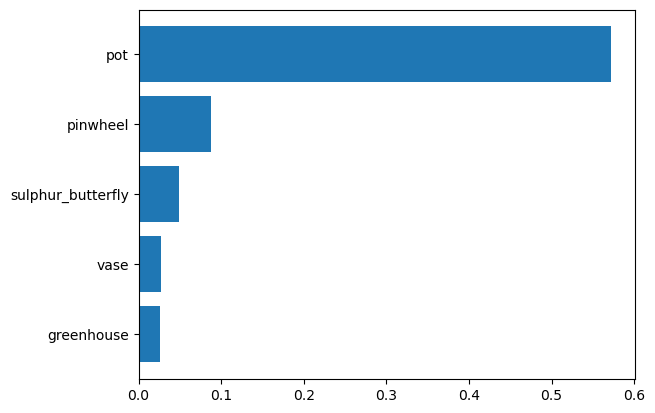

In [43]:
import torch
import torchvision.models as models
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image


    
# Load the pre-trained model
model = models.resnet50(pretrained=True)
model.eval()  # Set model to evaluation mode

# Define image transformations
transform = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the image
image_path = "flowers/test/99/image_07874.jpg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
tensor_image = transform(image).unsqueeze(0)  # Add batch dimension

# Get model predictions
with torch.no_grad():
   outputs = model(tensor_image)
   probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
   top5_prob, top5_catid = probabilities.topk(5)

print(top5_prob, top5_catid)
# Get corresponding class labels
class_names = [name for name,_ in model.fc.named_parameters()]
print(class_names)
for catid in top5_catid.tolist():
    print(catid)
top5_labels = [imagenet_class_index[str(catid)][1] for catid in top5_catid.tolist()]

# Plot the top 5 classifications
# plt.figure(figsize=(10, 5))
plt.barh(top5_labels[::-1], top5_prob.tolist()[::-1])
# plt.xlabel("Probability")
# plt.title("Top 5 Classifications")
plt.show()


In [32]:
imagenet_class_index['883'][1]

'vase'

In [38]:
top5_list = top5_prob.tolist()[::-1]

In [39]:
top5_list

[0.026178210973739624,
 0.0271099042147398,
 0.048939112573862076,
 0.08786383271217346,
 0.5719881653785706]

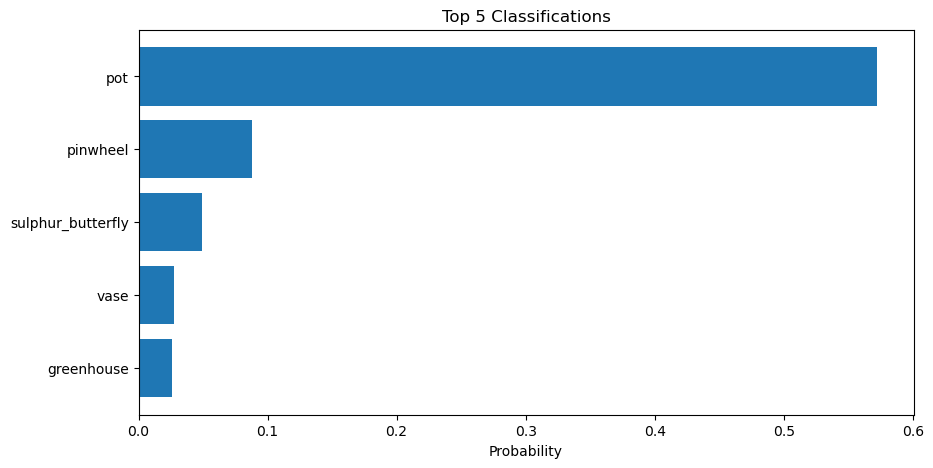

In [40]:
plt.figure(figsize=(10, 5))
plt.barh(top5_labels[::-1], top5_list)
plt.xlabel("Probability")
plt.title("Top 5 Classifications")
plt.show()
